<a href="https://colab.research.google.com/github/Amaliastf/PCVK_Ganjil_2023/blob/main/week_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amalia Salsa Lutfiana

3F/04/2141720228

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import cv2
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize
from skimage import io
from skimage import img_as_float
from skimage import io, color, morphology
from google.colab.patches import cv2_imshow
from PIL import Image as im

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

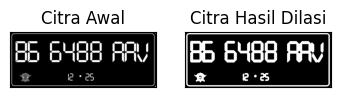

In [30]:
def dilasi_citra(F, w):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate Structuring Element Dilasi (SED) - Cross 5x5
    SED = np.array([[0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w = 5  # Ukuran SED (5x5)
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

[[1 1 1]
 [1 1 1]
 [1 1 1]]


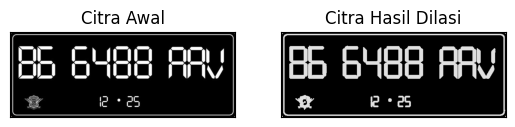

In [31]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

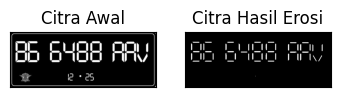

In [32]:
def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Generate Structuring Element Erosi (SE) - Square 5x5
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

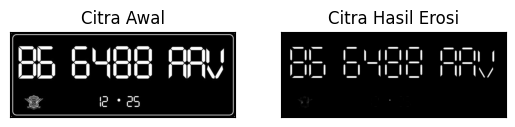

In [33]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: Operasi Opening Menggunakan tanpa Library Morphology

In [35]:
def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Generate Structuring Element Erosi (SE) - Square kxk
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

def dilasi_citra(F, k):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate Structuring Element Dilasi (SE) - Square kxk
    SE = np.ones((k, k), dtype=np.uint8)
    constant1 = (k - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SE
            imgD[i, j] = np.max(product)

    return imgD


**Operasi Opening Menggunakan tanpa Library Morphology**

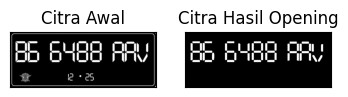

In [36]:
img_o = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg', 0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho, k), k)

plt.subplot(131), plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

**Operasi Opening Menggunakan Library Morphology**

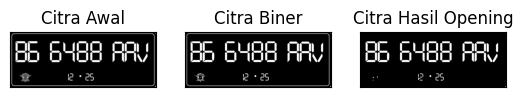

In [37]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: operasi closing tanpa library morphology

**operasi closing tanpa library morphology**

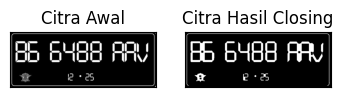

In [38]:
img_c= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

**operasi closing dengan library morphology**

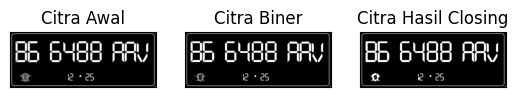

In [39]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Cross 3


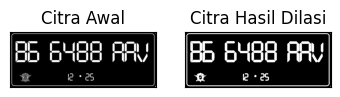

SED = Cross 5


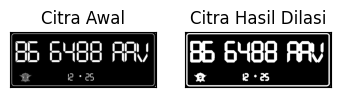

In [40]:
def dilasi_citra(F, SED):
    # Size image
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    constant1 = (SED.shape[0] - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

print('SED = Cross 3')
img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 3
SED_3 = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)
imgD = dilasi_citra(thresh, SED_3)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Cross 5')
img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w = 5
SED_5 = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)
imgD = dilasi_citra(thresh, SED_5)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()



10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Circle 3


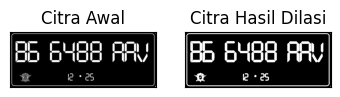

SED = Circle 5


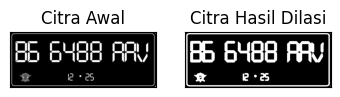

In [41]:
#Dilasi Circular SED

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

SE = Rectangle 3x5


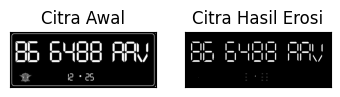

SE = Rectangle 5x7


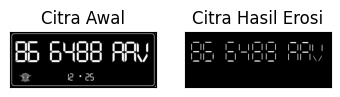

In [42]:
#Erosi Cross SE

def erosi_citra(F,p,l):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2 # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')

plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SE = Line Vertikal 3


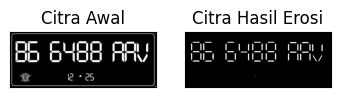

SE = Line Vertikal 5


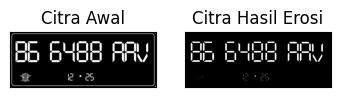

In [43]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal

  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

13. TopHat

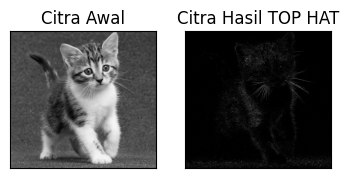

In [44]:
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()


14. BLACKHAT

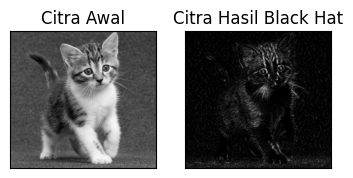

In [45]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

15. Skeleton

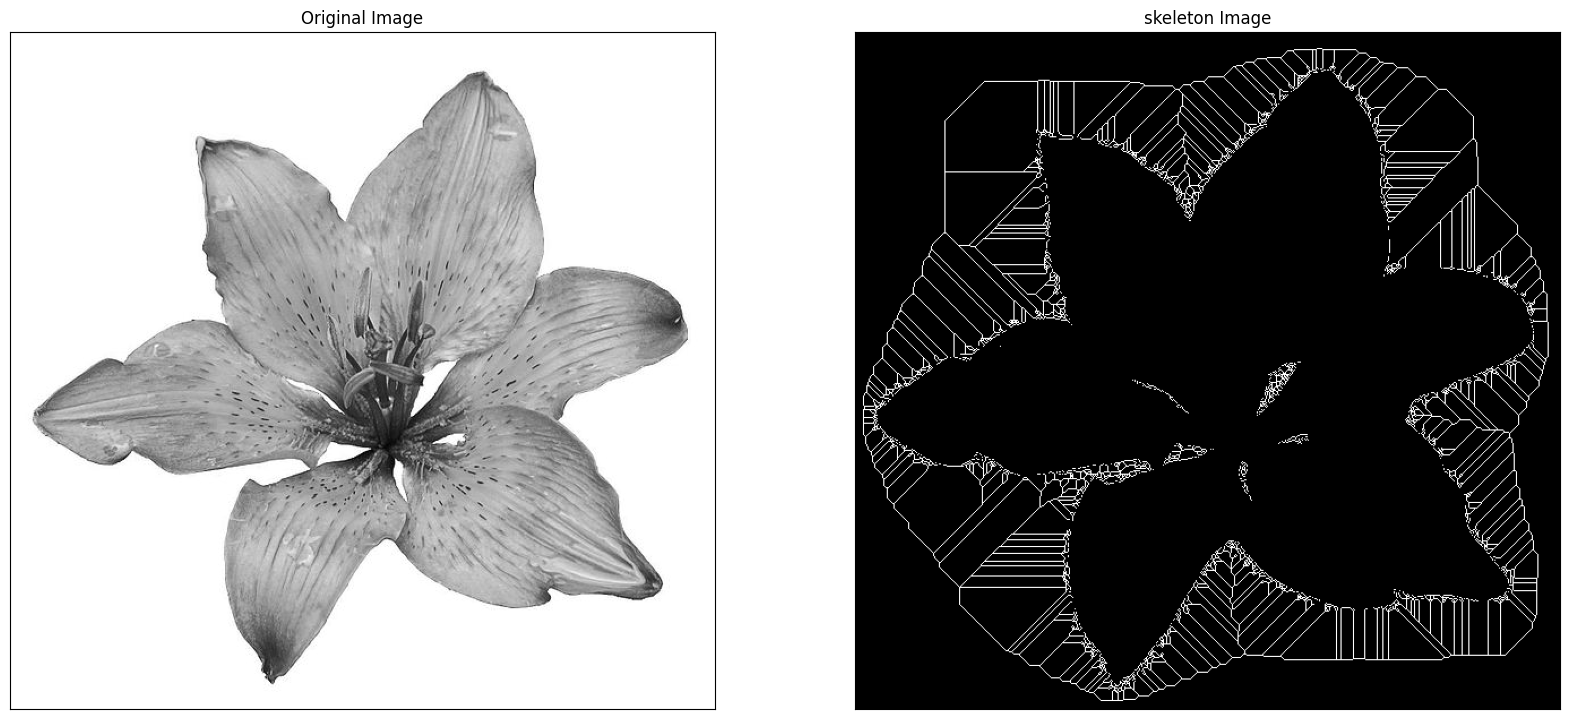

In [46]:
# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)

binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

16. Skeleton Inverse

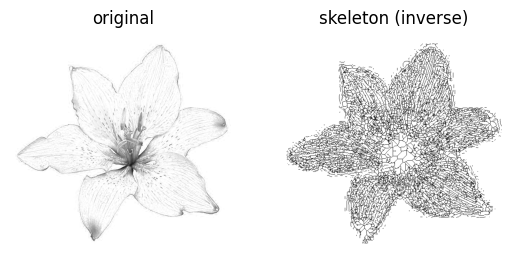

In [47]:
# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[..., 0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

17. Thickening

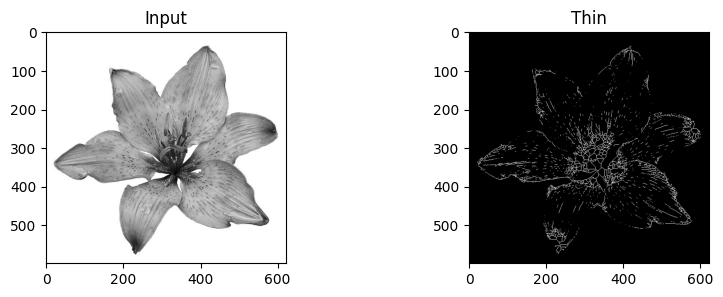

In [48]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

#Tugas

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.


**KTP**

Yofandra Arta P

3F/30/2141720121

In [58]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

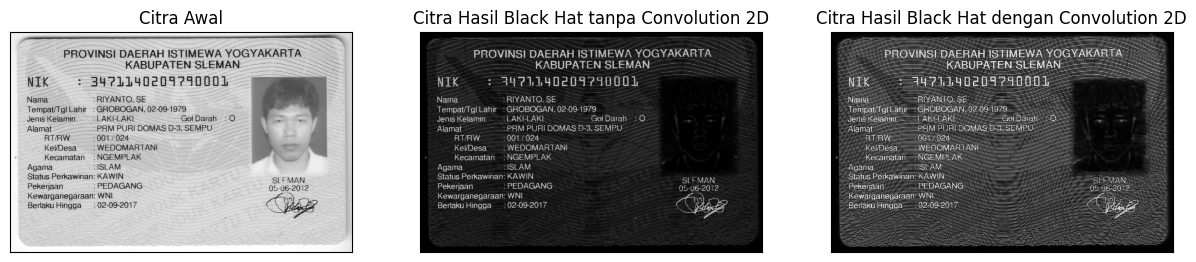

In [59]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp.png')

# Histogram
# brightness = Brightness(image, -10)
result = cv2.filter2D(image, -1, kernel_sharpen)
img1 = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, Kernel)
blackhat2 = cv2.morphologyEx(img2, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(15,30))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat2,cmap = 'gray')
plt.title('Citra Hasil Black Hat tanpa Convolution 2D'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat dengan Convolution 2D'), plt.xticks([]), plt.yticks([])
plt.show()

**kTP 1**

Maulidio Farhan

3F/19/2141720041

In [61]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)
  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

[[1]
 [1]]


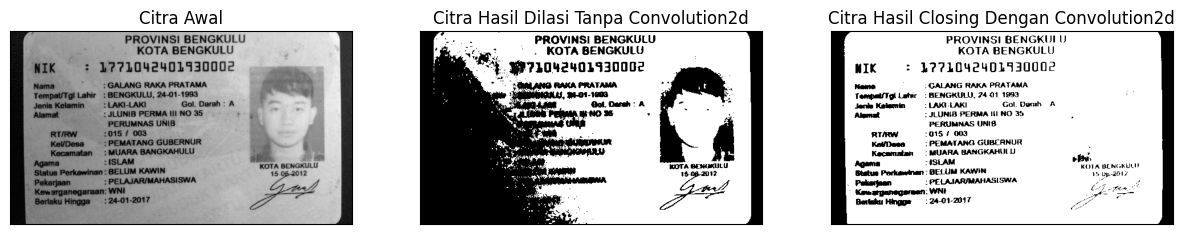

In [62]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp1.png')
input = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

result = conv2d(img, kernel_sharpen,1)
brightness = Brightness(result, 35)
input2 = cv.cvtColor(brightness, cv.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# kernel2 = np.ones((5,5),np.uint8)
# erosion = cv2.erode(thresh2,kernel2,iterations = 1)

kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

# kernel2 = np.ones((2,1),np.uint8)
# closs = cv2.morphologyEx(thresh2,cv2.MORPH_CLOSE, kernel)

print(kernel)

plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Citra Hasil Dilasi Tanpa Convolution2d')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Citra Hasil Closing Dengan Convolution2d')
plt.xticks([]), plt.yticks([])
plt.show()

**kTP 2**

Maulidio Farhan

3F/19/2141720041

[[1]
 [1]]


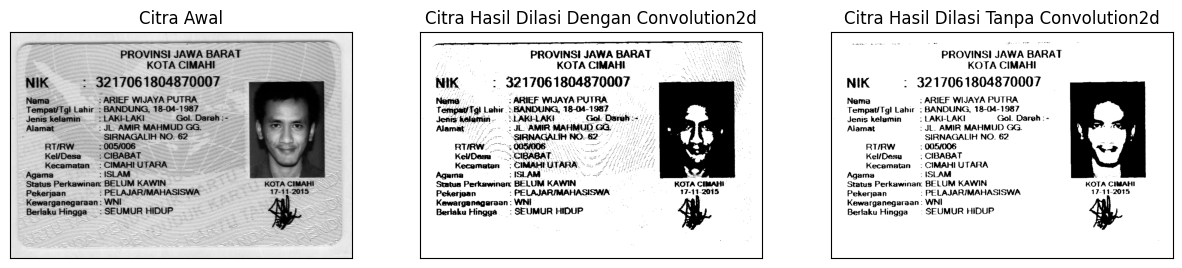

In [63]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp2.png')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow(ktp3)
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv.cvtColor(brightness, cv.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

print(kernel)
plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Citra Hasil Dilasi Dengan Convolution2d')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Citra Hasil Dilasi Tanpa Convolution2d')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 3 & KTP 4**

Raden Rizqi

3F/25/21417200064

Gray Image


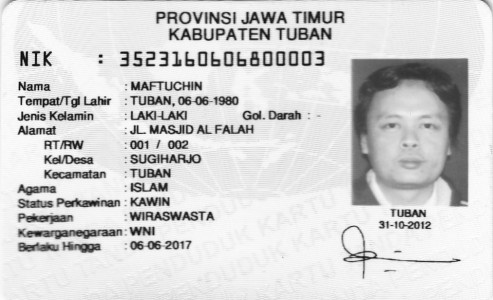

Final Image


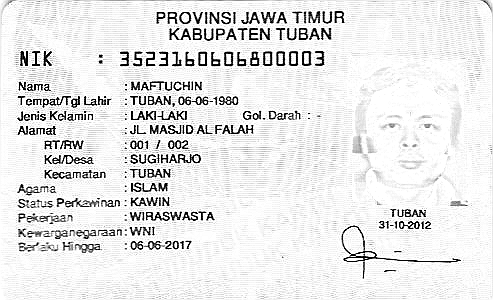

In [65]:
def convolution2d(image, kernel):
    tinggi = image.shape[0]
    lebar = image.shape[1]

    tinggi_kernel = kernel.shape[0]
    lebar_kernel = kernel.shape[1]

    start = int(lebar_kernel/2)

    image_result = np.copy(image)

    for y in range(start, tinggi - start):
        for x in range(start, lebar - start):
            value = 0

            for ky in range(tinggi_kernel):
                for kx in range(lebar_kernel):
                    i = y - start + ky
                    j = x - start + kx

                    value += image[i, j] * kernel[ky, kx]

            image_result[y, x] = np.clip(value, 0, 255)

    return image_result


img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp4.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

result_image = convolution2d(inverted_image, kernel_sharpen)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(result_image)

Gray Image


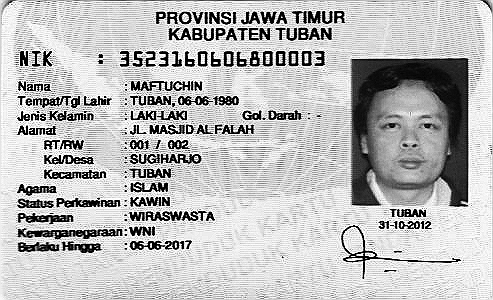

Final Image


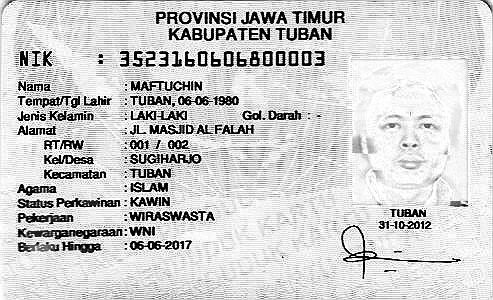

In [66]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp4_filtered.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(inverted_image)

**KTP 5**

Amalia Salsa Lutfiana

3F/04/2141720228

In [67]:
def Brightness(image, brightness):
    brightness_image = np.clip(image + brightness, 0, 255)
    return brightness_image

def conv2d(image, kernel, stride):
    height, width = image.shape[0], image.shape[1]
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

    start = int(kernel_width / 2)

    image_result = np.copy(image)

    for y in range(start, height - start, stride):
        for x in range(start, width - start, stride):
            value = 0

            for ky in range(kernel_height):
                for kx in range(kernel_width):
                    i = y - start + ky
                    j = x - start + kx

                    value += image[i, j] * kernel[ky, kx]

            image_result[y, x] = np.clip(value, 0, 255)

    return image_result

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype=np.float32)



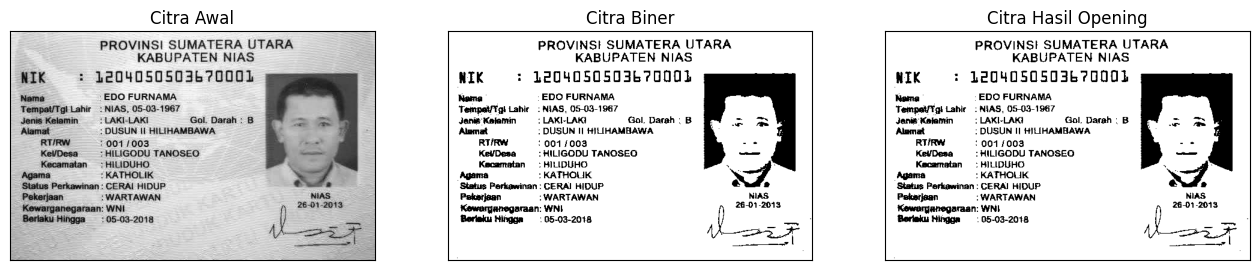

In [68]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp5.png', 0)

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result = conv2d(img, gauss_kernel, 1)
brightness = Brightness(result, -30)

# operasi opening dengan library morphology
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((1, 1), np.uint8)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(16, 8))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

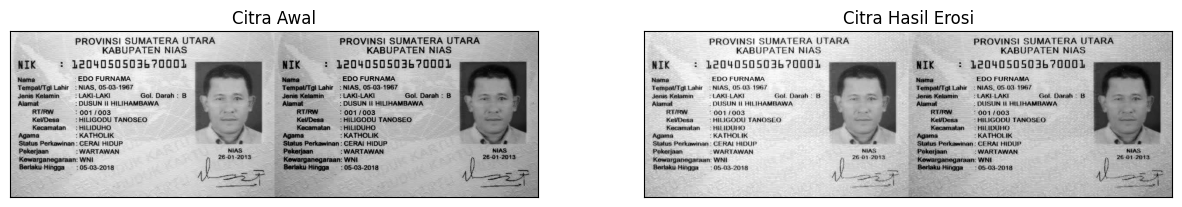

In [69]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp5.png', cv.IMREAD_GRAYSCALE)

kernel = np.ones((2,1),np.uint8)
erosion = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(15,13))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion, cmap='gray'),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()


**KTP 6**

Roziq Mahbubi

3F/27/214172086

Hasil terbaik ditemukan pada operasi morfologi clossing dengan kernel 1x1


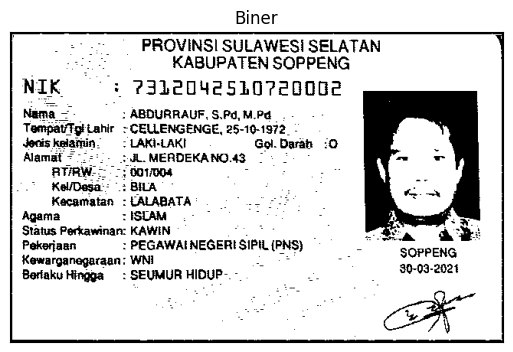

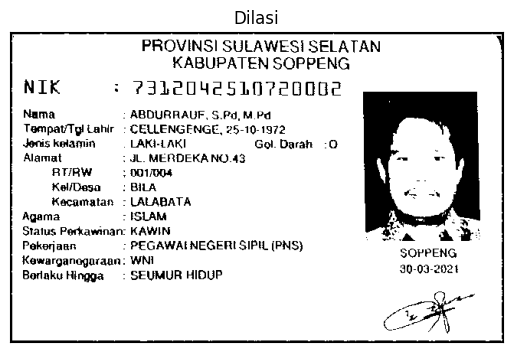

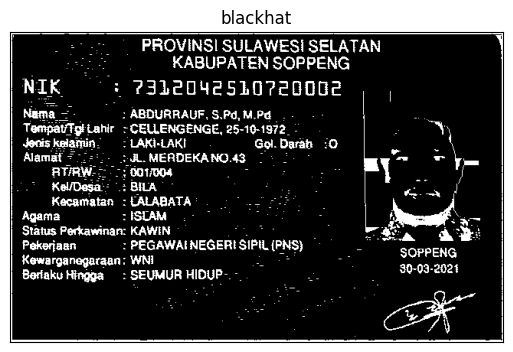

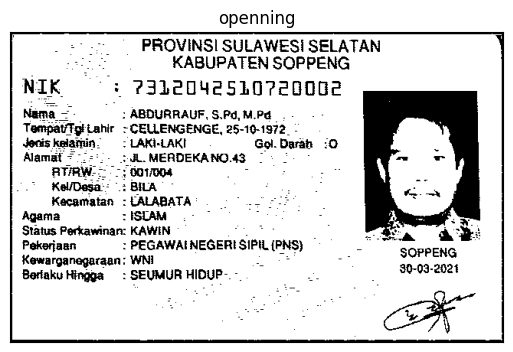

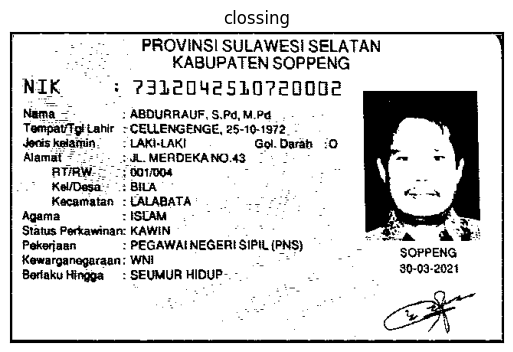

In [73]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/ktp6.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((1,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((1,1),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

print("Hasil terbaik ditemukan pada operasi morfologi clossing dengan kernel 1x1")

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 6**

Hasil Konvolusi

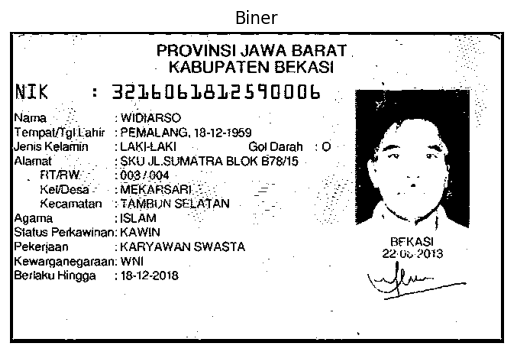

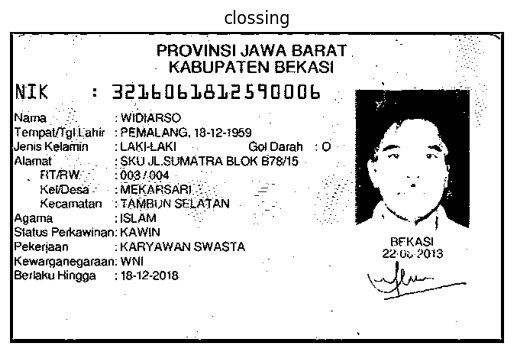

In [74]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp6_filtered.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((1,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(close, cmap='gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 7**

Roziq Mahbubi

3F/27/214172086

Hasil terbaik ditemukan pada operasi morfologi dilasi dengan kernel 2x1


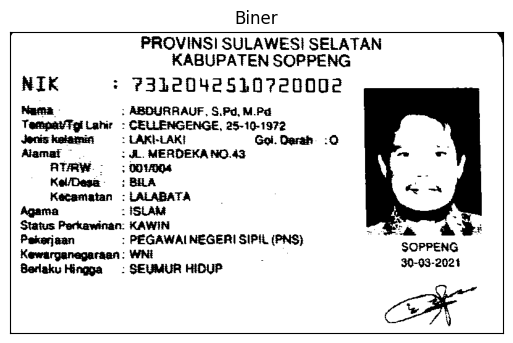

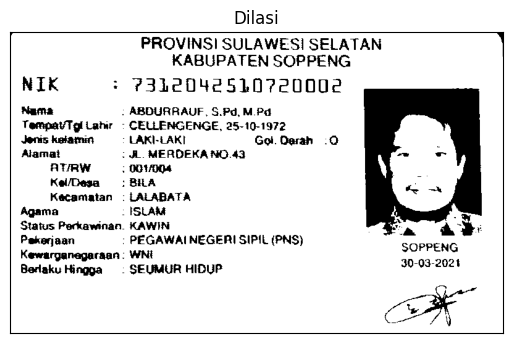

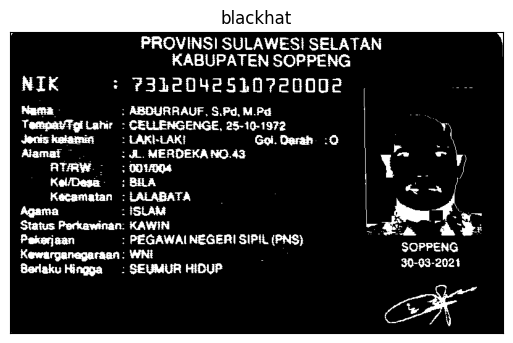

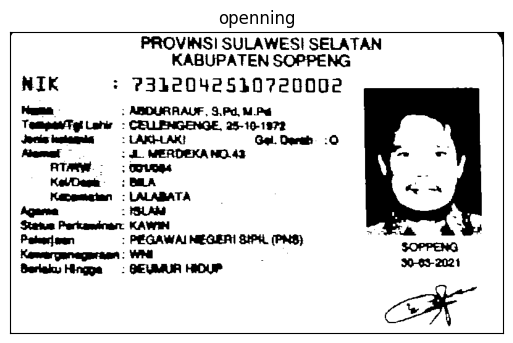

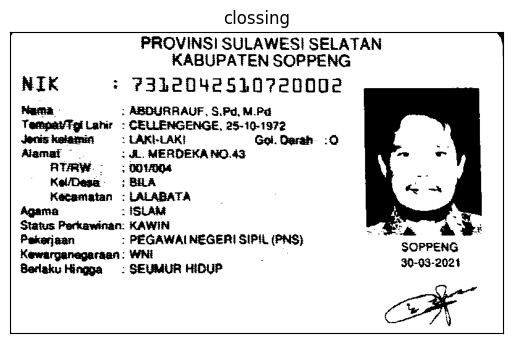

In [71]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_Per7/KTP7.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((1,1),np.uint8)
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, Kernel)
kernel = np.ones((0,0),np.uint8)
open = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel)

print("Hasil terbaik ditemukan pada operasi morfologi dilasi dengan kernel 2x1")

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi,cmap = 'gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(open,cmap = 'gray')
plt.title('openning')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(close,cmap = 'gray')
plt.title('clossing')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 7**

Hasil Konvolusi

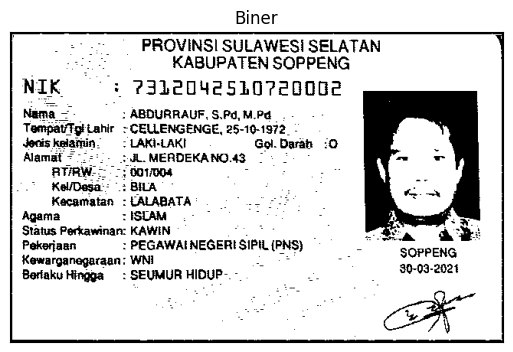

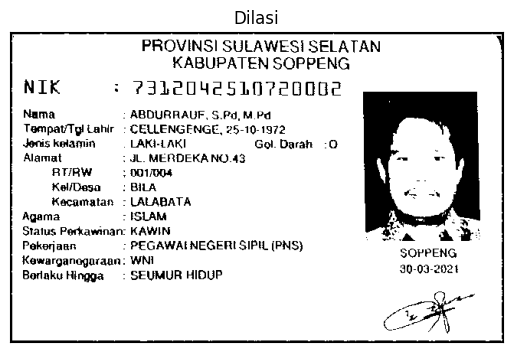

In [72]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp7_filtered.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((2,1),np.uint8)
dilasi = cv2.dilate(binary,kernel,iterations = 1)

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.title('Biner')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(122)
plt.imshow(dilasi, cmap='gray')
plt.title('Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()